<a href="https://colab.research.google.com/github/Sanaenajimi/data-science-portfolio/blob/main/Multiple_linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## EDA :

In [ ]:
df = pd.read_csv('test_energy_data.csv')

In [ ]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [ ]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [ ]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [ ]:
df.dtypes

,0
Building Type,object
Square Footage,int64
Number of Occupants,int64
Appliances Used,int64
Average Temperature,float64
Day of Week,object
Energy Consumption,float64


## Encoding Categorical variables

In [ ]:
X = df.iloc[:, :-1].values

In [ ]:
y = df.iloc[:, -1].values

In [ ]:
print(X[:3,:])

[['Residential' 24563 15 4 28.52 'Weekday']
 ['Commercial' 27583 56 23 23.07 'Weekend']
 ['Commercial' 45313 4 44 33.56 'Weekday']]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,-1] = le.fit_transform(X[:,-1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[:3,:])

[[0.0 0.0 1.0 24563 15 4 28.52 0]
 [1.0 0.0 0.0 27583 56 23 23.07 1]
 [1.0 0.0 0.0 45313 4 44 33.56 0]]


## Splitting the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Building regression model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

## Checking the model accuracy


In [ ]:
#Concatenating the predicted values and the y_test values to evaluate our model :
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[5900.29 5900.32]
 [3072.65 3072.63]
 [4103.39 4103.39]
 [3506.65 3506.64]
 [4276.25 4276.25]
 [5611.2  5611.18]
 [5116.9  5116.9 ]
 [3980.91 3980.9 ]
 [5162.35 5162.33]
 [2865.56 2865.57]
 [3388.3  3388.29]
 [4779.1  4779.08]
 [4510.2  4510.2 ]
 [3509.65 3509.64]
 [3451.61 3451.58]
 [4820.6  4820.59]
 [4618.75 4618.77]
 [4939.05 4939.07]
 [4400.5  4400.48]
 [4603.85 4603.83]]


In [103]:
residuals_list = []
for i in range(len(y_test)) :
  residuals_list.append((y_test[i]-y_pred[i]).round(2))
print(residuals_list)

[0.03, -0.02, -0.0, -0.01, -0.0, -0.02, 0.0, -0.01, -0.02, 0.01, -0.01, -0.02, -0.0, -0.01, -0.03, -0.01, 0.02, 0.02, -0.02, -0.02]


In [95]:
residuals = y_test - y_pred

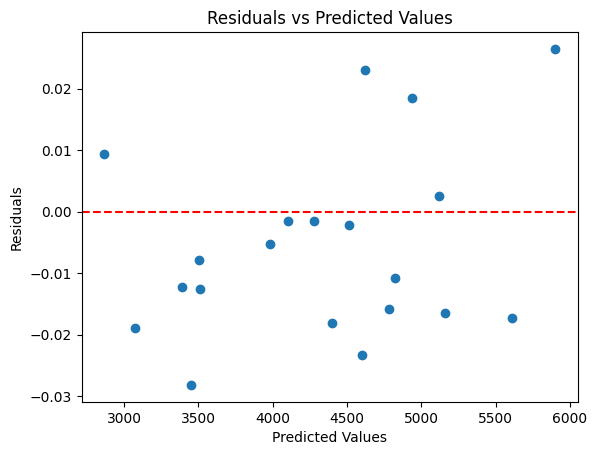

In [101]:
#Checking Homoscedasticity :
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
#The residuals appear to be randomly scattered around the horizontal line at zero, which is a good sign, There doesn’t seem to be a clear pattern in the spread of the residuals (the spread is roughly consistent across the predicted values). This suggests that the assumption of homoscedasticity may be satisfied.

In [104]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
#The r2 score is 0.99 very close to 1 , this suggests that our model fits the data well

0.9999999996232116


## The regression model

---



In [106]:
#get our coefficients
coef = lm.coef_
intercept = lm.intercept_
print(coef,intercept)


[ 5.78e-04  5.00e+02 -5.00e+02  5.00e-02  1.00e+01  2.00e+01 -5.00e+00
 -5.00e+01] 2050.014905341465


*Our regression model equation :*
 y = 0.000578*DummyVar + 500*DummyVar - 500*DummyVar +0.005X2 + X3 + 2*X4 - 5*X5 - 5*X6 +2050.0149




### Predicting a specific case with our model:
Let' predict the energy consumption when it's a weekday , and the building type is a residential with a square footage of 356989 & number of occupants = 60, & appliance used = 32, & average temp = 23




In [108]:
lm.predict([[0,0,1,356989,60,32,23,0]])
#The energy consumption is then 20524.42

array([20524.42])